# Ekstrak & Pre-proc Dataset 

In [17]:

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import re
from tqdm.auto import tqdm
tqdm.pandas()
     

In [18]:
df = pd.read_csv(r"D:\TEL-U\BANGKIT!\NARASPEAK\DATASET\C4_200M.tsv-00000-of-00010", delimiter='\t', nrows=500000)
df.columns = ["incorrect", "correct"]

In [19]:
df

,incorrect,correct
0,The effect of widespread dud targets two face ...,"1. The effect of ""widespread dud"" targets two ..."
1,tax on sales of stores for non residents are s...,Capital Gains tax on the sale of properties fo...
2,Much many brands and sellers still in the market.,Many brands and sellers still in the market.
3,this is is the latest Maintenance release of S...,This is is the latest maintenance release of S...
4,"Fairy Or Not, I'm the Godmother: no just look,...","Fairy Or Not, I'm the Godmother: Not just a lo..."
...,...,...
499995,If you were lucky enough to grab PAX it here i...,If you were lucky enough to grab a PAX pack he...
499996,"This page has last edited at December 20, 2018...","This page was last edited on December 20, 2018..."
499997,suction cup shower shelves bathroom corner sto...,suction cup shower shelves bathroom corner sto...
499998,W work over pass 2012 can be seen in the photo...,Woman working past 2012 can be seen in the pho...


In [20]:
# Adding length features


df['correct_char_count'] = df['correct'].astype('str').apply(lambda x:len(x))
df['incorrect_char_count'] = df['incorrect'].astype('str').apply(lambda x:len(x))

df['correct_word_count'] = df['correct'].astype('str').apply(lambda x:len(x.split()))
df['incorrect_word_count'] = df['incorrect'].astype('str').apply(lambda x:len(x.split()))

In [21]:
df.head(5)

,incorrect,correct,correct_char_count,incorrect_char_count,correct_word_count,incorrect_word_count
0,The effect of widespread dud targets two face ...,"1. The effect of ""widespread dud"" targets two ...",92,87,16,15
1,tax on sales of stores for non residents are s...,Capital Gains tax on the sale of properties fo...,355,334,63,59
2,Much many brands and sellers still in the market.,Many brands and sellers still in the market.,44,49,8,9
3,this is is the latest Maintenance release of S...,This is is the latest maintenance release of S...,55,54,10,10
4,"Fairy Or Not, I'm the Godmother: no just look,...","Fairy Or Not, I'm the Godmother: Not just a lo...",100,94,20,18


# Preprocessing
Removing Missing/NA

In [22]:

pd.DataFrame(df.isna().sum(),columns=['missing_count'])

,missing_count
incorrect,0
correct,2
correct_char_count,0
incorrect_char_count,0
correct_word_count,0
incorrect_word_count,0


In [23]:

df[df.isna().any(axis=1)]

,incorrect,correct,correct_char_count,incorrect_char_count,correct_word_count,incorrect_word_count
152174,Some information and sources for the Fourier c...,NaN,3,234,1,38
487904,Unpacking the Effects of Repression: the Evolu...,NaN,3,375,1,55


In [24]:

df = df.dropna().reset_index(drop=True)

In [25]:

df.shape

(499998, 6)

Keep unique sentence pairs

In [26]:
print(f"total number of duplicate pairs: {len(df[df['correct']==df['incorrect']])}")

total number of duplicate pairs: 3072


In [27]:

df[df['correct']==df['incorrect']].sample(5)

,incorrect,correct,correct_char_count,incorrect_char_count,correct_word_count,incorrect_word_count
468113,Now spoon in 1 tbsp of potato masala all over ...,Now spoon in 1 tbsp of potato masala all over ...,57,57,12,12
432713,I’ve stopped hating Taylor Swift.,I’ve stopped hating Taylor Swift.,33,33,5,5
81637,She then started to notice more unusual symptoms.,She then started to notice more unusual symptoms.,49,49,8,8
41707,Cheers! Do you enjoy wine?,Cheers! Do you enjoy wine?,26,26,5,5
442785,Origional and High quality images of Bellevue ...,Origional and High quality images of Bellevue ...,53,53,8,8


In [28]:
df = df[df['correct']!=df['incorrect']]

In [29]:
df.shape

(496926, 6)

In [30]:
df.sample(5)

,incorrect,correct,correct_char_count,incorrect_char_count,correct_word_count,incorrect_word_count
114645,Giovanni Caggiano & Erem Castelnuovo & Oli Dam...,Giovanni Caggiano & Efrem Castelnuovo & Olivie...,295,302,39,44
363676,"Russia, Jewish victimas Fund: per Rev I Solomo...","Russia, Jewish Victims Fund. Per Rev I. Solomo...",68,67,12,13
46521,But in some ways there are a lot more question...,"But in some ways, there are a lot more questio...",103,101,19,19
415263,"I love Callas but next Sutherlandic, even Call...","I love Callas but next to Sutherland, even Cal...",75,73,14,13
237295,Child Safety standards were also introduced an...,Child Safety Standards have also been introduc...,259,243,44,40


Remove Duplicates

In [31]:

print(f'total number of duplicates: {df.duplicated().sum()}')

total number of duplicates: 0


In [32]:

df[df.duplicated(keep=False)].sort_values('Correct')

KeyError: 'Correct'

In [ ]:

df = df.drop_duplicates().reset_index(drop=True)

In [ ]:
df.shape

(496926, 6)

In [ ]:
df.sample(5)

,Incorrect,Correct,correct_char_count,incorrect_char_count,correct_word_count,incorrect_word_count
283818,She doesn’t have a name yet but the 11-month-o...,"She doesn’t have a name yet, but the 11-month-...",140,124,25,22
422554,Derivation process has been lifted such that c...,The derivation process has been lifted such th...,143,133,20,18
199598,Despite a front of bad weather heading western...,Despite a front of bad weather heading up New ...,136,130,24,22
187798,1) what self-awareness is [and how to how main...,1. What self-awareness is (and how to cultivat...,52,54,9,10
66688,"NRC: Package ML062630002 - Browns Ferry, at Un...","NRC: Package ML062630002 - Browns Ferry, Unit ...",155,148,23,24


Remove Small sentences

In [ ]:
df[df['incorrect_char_count']<2].shape

(0, 6)

In [ ]:

df = df[df['incorrect_char_count']>2].reset_index(drop=True)

In [ ]:
df.shape

(496920, 6)

In [ ]:
df[df['correct_char_count']<2].shape

(0, 6)

In [ ]:
df[df['correct_char_count']<2].sample

<bound method NDFrame.sample of Empty DataFrame
Columns: [Incorrect, Correct, correct_char_count, incorrect_char_count, correct_word_count, incorrect_word_count]
Index: []>

In [ ]:
df = df[df['correct_char_count']>2].reset_index(drop=True)

In [ ]:
df.shape

(496920, 6)

Cleaning Text

In [ ]:
#https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have","n\'t":" not","\'re":" are","\'s": " is","\'d":" would",
                     "\'ll": " will","\'t":" not","\'ve": " have","\'m":" am"}


# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

In [ ]:
def clean(text):
    text = re.sub('\s*\<.*?\>\s', '', text)
    text = re.sub('\s*.*?\s', '', text)
    text = re.sub('\s*.*?\s', '', text)
    text = re.sub('\s*\{.*?\}\s', '', text)
    text = re.sub("[-+@#^/|*(){}$~<>=_%:;]","",text)
    text = text.replace("\\","")
    text = re.sub("\[","",text)
    text = re.sub("\]","",text)
    text = re.sub("\<","",text)
    text = re.sub("\>","",text)
    text = re.sub("\(","",text)
    text = re.sub("\)","",text)
    text = re.sub("[0-9]","",text)
    text = ' '.join(text.split())
    return text

In [ ]:

# df['Correct'] = df['Correct'].progress_apply(clean)
df['Correct'] = df['Correct'].progress_apply(expand_contractions)

KeyError: 'Correct'

In [ ]:

# df['Incorrect'] = df['Incorrect'].progress_apply(clean)
df['Incorrect'] = df['Incorrect'].progress_apply(expand_contractions)

KeyError: 'Incorrect'

In [ ]:
df.sample(10)

,incorrect,correct,correct_char_count,incorrect_char_count,correct_word_count,incorrect_word_count
447816,Accordind to Yupik culture a Alaskan indiginou...,According to Yupik culture- an indigenous Alas...,285,279,50,48
154093,Pondicherry University Lawspet Pondicherry- 60...,"Pondicherry University,Lawspet, Pondicherry - ...",54,55,6,7
181492,But relatively more important to getting somew...,But relatively more important in the socialist...,54,74,8,10
12722,AcQuest 1065 Solution 2010 use supporting deta...,AcQuest 1065 Solution 2010 is used for support...,71,63,10,8
177850,Half back: this is one of the styles allow to ...,Half back: this is one of the styles that allo...,257,251,50,49
304076,IBM would break to the crypto cus tody space.,IBM is coming to the crypto custody space.,42,45,8,9
56756,BUHARI shoutr unofficial closing at top of his...,BUHARI shouting at top of his voice during fed...,83,99,13,14
12686,One of the biggest things we enjoy doing is lo...,One of the biggest things we enjoy doing is lo...,277,273,53,53
555,latex agenda template format of meeting of res...,latex agenda template format of meeting for re...,59,58,9,9
55817,"One of world's best undrground sites, this for...","One of the world's best underground sites, the...",131,127,24,22


In [ ]:
def remove_spaces(text) : 
    text = re.sub(r" '(\w)",r"'\1",text)
    text = re.sub(r" \,",",",text)
    text = re.sub(r" \.+",".",text)
    text = re.sub(r" \!+","!",text)
    text = re.sub(r" \?+","?",text)
    text = re.sub(" n't","n't",text)
    text = re.sub("[\(\)\;\_\^\`\/]","",text)
    
    return text


def decontract(text) : 
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    
    return text



In [ ]:
def WrongSentence_preprocessing(col) : 
    df[col] = df[col].astype(str) 
    df[col] = df[col].apply(lambda x:x.lower()) 
    df[col] = df[col].apply(lambda x : re.sub("\n","",x)) 
    df[col] = df[col].apply(lambda x : remove_spaces(x)) 
    df[col] = df[col].apply(lambda x : re.sub(r"\.+",".",x)) 
    df[col] = df[col].apply(lambda x : re.sub(r"\!+","!",x)) 
    df[col] = df[col].apply(lambda x : decontract(x)) 
    df[col] = df[col].apply(lambda x: re.sub("[^A-Za-z\s]","",x)) 
    df[col] = df[col].apply(lambda x: x.replace("\s+"," "))
    df[col] = df[col].apply(lambda x: " ".join([word for word in x.split()]))
    return df

def TrueSentence_preprocessing(col) : 
    df[col] = df[col].astype(str) 
    df[col] = df[col].apply(lambda x:x.lower()) 
    df[col] = df[col].apply(lambda x : re.sub("\n","",x)) 
    df[col] = df[col].apply(lambda x : remove_spaces(x)) 
    df[col] = df[col].apply(lambda x : re.sub(r"\.+",".",x)) 
    df[col] = df[col].apply(lambda x : re.sub(r"\!+","!",x)) 
    df[col] = df[col].apply(lambda x : decontract(x)) 
    df[col] = df[col].apply(lambda x: re.sub("[^A-Za-z\s]","",x)) 
    df[col] = df[col].apply(lambda x: re.sub(r'\d','',x))
    df[col] = df[col].apply(lambda x: re.sub(r'\s+',' ',x))
    df[col] = df[col].apply(lambda x: re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,।]", "", x))
    df[col] = df[col].apply(lambda x: x.strip())
    # df[col] = "<sos> " + df[col] + " <eos>"
    return df

In [ ]:
df = WrongSentence_preprocessing('Incorrect') 
df = TrueSentence_preprocessing('Correct')

KeyError: 'Incorrect'

In [ ]:
df.sample(10)

,Incorrect,Correct,correct_char_count,incorrect_char_count,correct_word_count,incorrect_word_count
357976,insert joke about this fistpumping here the th...,insert joke about fistpumping here the three s...,132,136,20,21
263869,us green building council usgbc has awarded le...,the us green building council usgbc has awarde...,210,206,30,30
225734,juanita vero of greenough is a partner in e ba...,juanita vero of greenough is a partner in e ba...,97,90,18,17
136123,i have tried with various forums and have foll...,i have tried various forums and have followed ...,120,120,20,21
70938,and roman pavlyuchenko stretched to meets a lo...,and roman pavlyuchenko stretched to meet a low...,127,126,25,25
189559,be aware of loose rock on top of the formation,be aware of loose rock on top of the formation,47,49,10,11
220069,so what is a mediana show true realy,so what is the mediana show really,36,38,7,8
239056,the ringleader and a crew of members of a pate...,the ringleader and a crew of members of a pate...,302,300,49,50
150497,the client acknowledge that all of didias inte...,the client acknowledges that all of didias int...,485,479,73,73
235571,from sonyas linetales at onlywords,from sonyas linetales at onlywords,40,39,5,5


In [ ]:
df.to_csv('cleaned_data.csv', index=False)

### Import Libraries and Data


In [ ]:

import zipfile
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense,RNN
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import seaborn as sns
import os
from datetime import datetime
import pytz
from tensorflow.keras.callbacks import LearningRateScheduler,TensorBoard,ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam,Nadam
import warnings
warnings.filterwarnings('ignore')
import nltk.translate.bleu_score as bleu
import random
from tqdm import tqdm
import shutil
import io
from nltk.translate.gleu_score import sentence_gleu
import pickle
     

In [ ]:
final_df = pd.read_csv(r'D:\TEL-U\BANGKIT!\NARASPEAK\cleaned_data.csv')


In [ ]:
final_df = final_df[final_df['incorrect_word_count'] <= 12]
final_df.shape

(158777, 6)

In [ ]:
final_df = final_df[['correct','incorrect']]

In [ ]:

final_df[final_df.isna().any(axis=1)]

,correct,incorrect


### Train Test Split

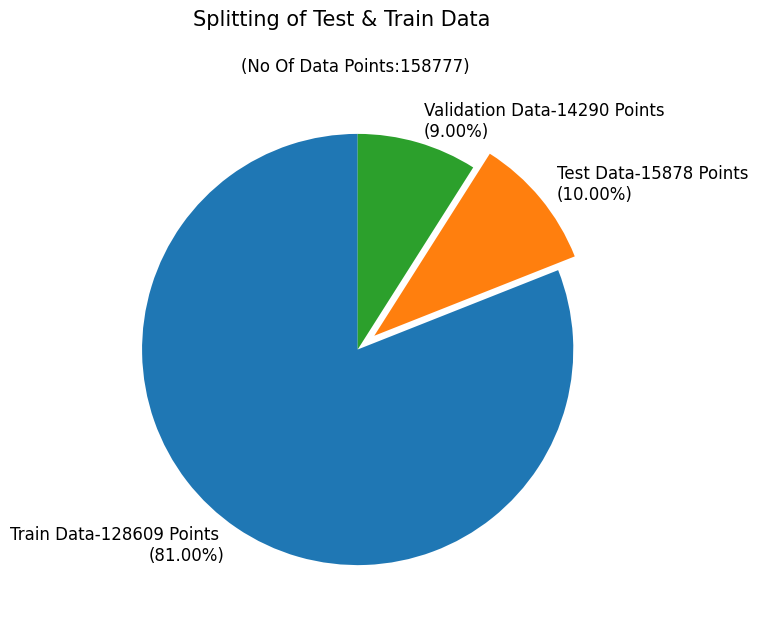

In [ ]:
train,test = train_test_split(final_df, test_size=0.1,random_state=15)
train,validation = train_test_split(train, test_size=0.1)
fig,ax = plt.subplots(figsize =(10, 7))
labels_split = ['Train', 'Test','Validation'] 
sizes_split = [len(train),len(test),len(validation)]
pcts_split = [f'{l} Data-{s} Points \n({s*100/sum(sizes_split):.2f}%)' for s,l in zip(sizes_split, labels_split)] 
ax.pie(sizes_split, labels = pcts_split, startangle = 90, 
       explode=(0,0.1,0),textprops = {"fontsize":12} )

plt.suptitle(f'Splitting of Test & Train Data ', fontsize = 15)
plt.title(f'(No Of Data Points:{sum(sizes_split)}) ', fontsize = 12)
plt.show()

In [ ]:
train['dec_correct_inp'] = ' ' + train['correct'].astype(str)
train['dec_correct_out'] = train['correct'].astype(str) + ' '

validation['dec_correct_inp'] = ' ' + validation['correct'].astype(str)
validation['dec_correct_out'] = validation['correct'].astype(str) + ' '

test['dec_correct_inp'] = ' ' + test['correct'].astype(str)
test['dec_correct_out'] = test['correct'].astype(str) + ' '

In [ ]:
train.sample(5)

,correct,incorrect,dec_correct_inp,dec_correct_out
218052,"savvylabell, Skylycat and IridescentOwl like t...","savvylabell, Skylycat and I,ridescentOwl like ...","savvylabell, Skylycat and IridescentOwl like ...","savvylabell, Skylycat and IridescentOwl like t..."
150436,Mainly used for a garden bed topping.,And today it used for a garden bed topping,Mainly used for a garden bed topping.,Mainly used for a garden bed topping.
52209,This Beautuful Garnet mineral stone formed int...,This Beautuful Garnet mineral stone for a sphe...,This Beautuful Garnet mineral stone formed in...,This Beautuful Garnet mineral stone formed int...
368864,SiteRanking.com - provides a categorized direc...,SiteRanking.com it - has a categorized directo...,SiteRanking.com - provides a categorized dire...,SiteRanking.com - provides a categorized direc...
204063,Shine Your Light Forth in Clarity!,Shne Your Light Forth in Clarity!,Shine Your Light Forth in Clarity!,Shine Your Light Forth in Clarity!


In [ ]:
test.sample(5)

,correct,incorrect,dec_correct_inp,dec_correct_out
156122,What we forgive too freely doesn’t stay forgiven.,What we forbid too freely do’t remain forgiven.,What we forgive too freely doesn’t stay forgi...,What we forgive too freely doesn’t stay forgiv...
231642,Only 514 people have been in space.,Only 514 people have trans space.,Only 514 people have been in space.,Only 514 people have been in space.
220279,Houston resident Veon McReynolds rides his bic...,Houston resident Veon McReynolds rides his bic...,Houston resident Veon McReynolds rides his bi...,Houston resident Veon McReynolds rides his bic...
138214,"are assembled using verbs: bill-to, ship-to, a...","assemble them using verbs; bill-to, ship-to an...","are assembled using verbs: bill-to, ship-to, ...","are assembled using verbs: bill-to, ship-to, a..."
284944,Are you moving to a new city in Texas?,Are you moving in a new city in Texas?,Are you moving to a new city in Texas?,Are you moving to a new city in Texas?


In [ ]:

validation.sample(5)

,correct,incorrect,dec_correct_inp,dec_correct_out
308794,Can I sue for more than the defendant’s insura...,Can I sue more than the defendants’s insurance...,Can I sue for more than the defendant’s insur...,Can I sue for more than the defendant’s insura...
268763,What reports can I view?,Where can I view firm?,What reports can I view?,What reports can I view?
342990,This page was generated in 0.5117 seconds.,This page were generated in 0.5117 second.,This page was generated in 0.5117 seconds.,This page was generated in 0.5117 seconds.
459147,How to get diagnosed by a “chiropractor” for F...,How get're diagnosed by a “chiropractor” for F...,How to get diagnosed by a “chiropractor” for ...,How to get diagnosed by a “chiropractor” for F...
276846,Stanford Way Care Home facility service is for...,Stanford Way Care Home facility service is pro...,Stanford Way Care Home facility service is fo...,Stanford Way Care Home facility service is for...


In [ ]:
train.to_csv(r'D:\TEL-U\BANGKIT!\NARASPEAK\train.csv')
validation.to_csv(r'D:\TEL-U\BANGKIT!\NARASPEAK\validation.csv')
test.to_csv(r'D:\TEL-U\BANGKIT!\NARASPEAK\test.csv')

In [ ]:
tokenizer_enc = Tokenizer(filters='#$%&()*+/=?@[\]^_`{|}~\t\n',lower=False)
tokenizer_enc.fit_on_texts(train['incorrect'].astype(str).values)

In [ ]:
tokenizer_dec = Tokenizer(filters='#$%&()*+/=?@[\]^_`{|}~\t\n',lower=False)
tokenizer_dec.fit_on_texts(train['dec_correct_inp'].astype(str).values)

In [ ]:

vocab_size_enc=len(tokenizer_enc.word_index.keys())
print('Encoder words vocab size:',vocab_size_enc)

Encoder words vocab size: 197778


In [ ]:
vocab_size_dec=len(tokenizer_dec.word_index.keys())
print('Decoder words vocab size::',vocab_size_dec)

Decoder words vocab size:: 166587


### Tokenizer

In [ ]:
tokenizer_dec.word_index[''],tokenizer_dec.word_index.get('', None)



(166590, 166590)

In [ ]:
# tokenizer_dec.word_index[''] = max(tokenizer_dec.word_index.values()) + 1

tokenizer_dec.word_index[''] = max(tokenizer_dec.word_index.values()) + 1
# word_index = tokenizer_dec.word_index
# reverse_word_index = {value: key for key, value in tokenizer_dec.word_index.items()}  # Create reverse_word_index if needed

# print(word_index)  # Print to check keys and values
# print(reverse_word_index)  # Print to check keys and values

In [ ]:
with open ('/TEL-U/BANGKIT!/NARASPEAK/tokenizer_enc.pkl', 'wb') as f:
  pickle.dump(tokenizer_enc, f)

with open('/TEL-U/BANGKIT!/NARASPEAK/tokenizer_dec.pkl', 'wb') as f:
  pickle.dump(tokenizer_dec, f)

In [ ]:
# Tokenization
tokenizer_enc = Tokenizer(filters='#$%&()*+/=?@[\]^_`{|}~\t\n', lower=False)
tokenizer_enc.fit_on_texts(train['incorrect'].astype(str).values)
tokenizer_dec = Tokenizer(filters='#$%&()*+/=?@[\]^_`{|}~\t\n', lower=False)
tokenizer_dec.fit_on_texts(train['dec_correct_inp'].astype(str).values)

# Vocabulary sizes
vocab_size_enc = len(tokenizer_enc.word_index.keys())
print('Encoder words vocab size:', vocab_size_enc)
vocab_size_dec = len(tokenizer_dec.word_index.keys())
print('Decoder words vocab size::', vocab_size_dec)

# Handling the empty string key
if '' not in tokenizer_dec.word_index:
    tokenizer_dec.word_index[''] = max(tokenizer_dec.word_index.values()) + 1

# text2seq
train_enc_inp = tokenizer_enc.texts_to_sequences(train['incorrect'].astype(str).values)
validation_enc_inp = tokenizer_enc.texts_to_sequences(validation['incorrect'].astype(str).values)
test_enc_inp = tokenizer_enc.texts_to_sequences(test['incorrect'].astype(str).values)

# Padding
max_seq_len = 12
train_enc_inp = pad_sequences(train_enc_inp, maxlen=max_seq_len, padding='post', truncating='post')
validation_enc_inp = pad_sequences(validation_enc_inp, maxlen=max_seq_len, padding='post', truncating='post')

# text2seq for decoder input
train_dec_inp = tokenizer_dec.texts_to_sequences(train['dec_correct_inp'].astype(str).values)
validation_dec_inp = tokenizer_dec.texts_to_sequences(validation['dec_correct_inp'].astype(str).values)

# Padding for decoder input
train_dec_inp = pad_sequences(train_dec_inp, maxlen=max_seq_len+1, padding='post', truncating='post')
validation_dec_inp = pad_sequences(validation_dec_inp, maxlen=max_seq_len+1, padding='post', truncating='post')

# text2seq for decoder output
train_dec_out = tokenizer_dec.texts_to_sequences(train['dec_correct_out'].astype(str).values)
validation_dec_out = tokenizer_dec.texts_to_sequences(validation['dec_correct_out'].astype(str).values)

# Padding for decoder output
train_dec_out = pad_sequences(train_dec_out, maxlen=max_seq_len+1, padding='post', truncating='post')
validation_dec_out = pad_sequences(validation_dec_out, maxlen=max_seq_len+1, padding='post', truncating='post')



Encoder words vocab size: 197778
Decoder words vocab size:: 166586


### Text to Sequence

Mean Word Count:8.610890373146514


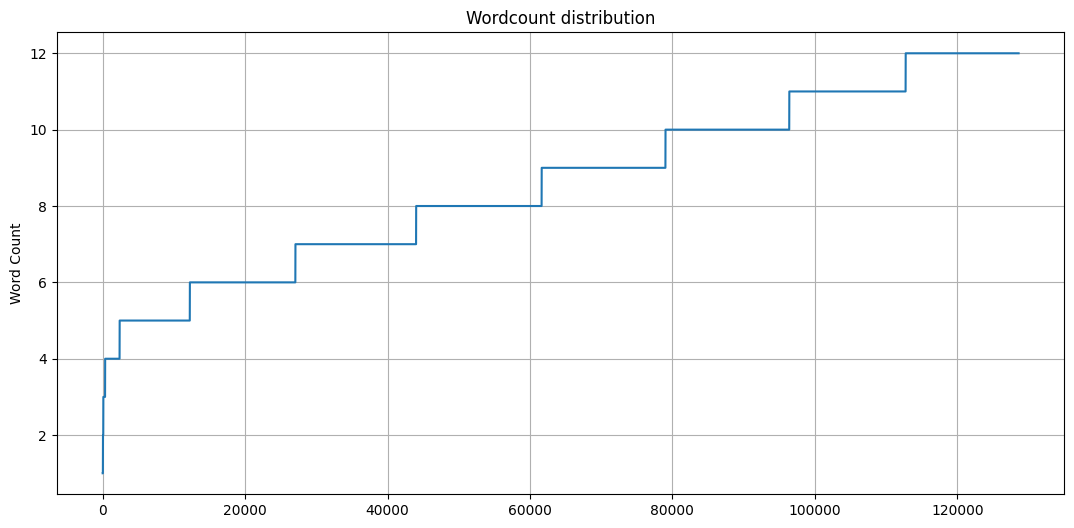

In [ ]:
content=train['incorrect'].astype('str')
content_word_count=[len(content.iloc[i].split()) for i in range(len(content))]
mean_word_count=np.mean(content_word_count)
print(f'Mean Word Count:{mean_word_count}')
index=[i for i in range(0,len(content_word_count))]
fig, ax=plt.subplots(figsize=(13, 6))
plt.plot(index,sorted(content_word_count))
plt.grid()
plt.title("Wordcount distribution")
plt.ylabel("Word Count")
plt.show()

In [ ]:

#text2seq
train_enc_inp = tokenizer_enc.texts_to_sequences(train['incorrect'].astype(str).values)
validation_enc_inp = tokenizer_enc.texts_to_sequences(validation['incorrect'].astype(str).values)
test_enc_inp = tokenizer_enc.texts_to_sequences(test['incorrect'].astype(str).values)

#padding
max_seq_len = 12
train_enc_inp = pad_sequences(train_enc_inp, maxlen=max_seq_len, padding='post', truncating='post')
validation_enc_inp = pad_sequences(validation_enc_inp, maxlen=max_seq_len, padding='post', truncating='post')
test_enc_inp = pad_sequences(test_enc_inp, maxlen=max_seq_len, padding='post', truncating='post')
     

In [ ]:
#text2seq
train_dec_inp = tokenizer_dec.texts_to_sequences(train['dec_correct_inp'].astype(str).values)
validation_dec_inp = tokenizer_dec.texts_to_sequences(validation['dec_correct_inp'].astype(str).values)
test_dec_inp = tokenizer_dec.texts_to_sequences(test['dec_correct_inp'].astype(str).values)

#padding
train_dec_inp = pad_sequences(train_dec_inp, maxlen=max_seq_len+1, padding='post', truncating='post')
validation_dec_inp = pad_sequences(validation_dec_inp, maxlen=max_seq_len+1, padding='post', truncating='post')
test_dec_inp = pad_sequences(test_dec_inp, maxlen=max_seq_len+1, padding='post', truncating='post')
     

In [ ]:

#text2seq
train_dec_out = tokenizer_dec.texts_to_sequences(train['dec_correct_out'].astype(str).values)
validation_dec_out = tokenizer_dec.texts_to_sequences(validation['dec_correct_out'].astype(str).values)
test_dec_out = tokenizer_dec.texts_to_sequences(test['dec_correct_out'].astype(str).values)

#padding
train_dec_out = pad_sequences(train_dec_out, maxlen=max_seq_len+1, padding='post', truncating='post')
validation_dec_out = pad_sequences(validation_dec_out, maxlen=max_seq_len+1, padding='post', truncating='post')
test_dec_out = pad_sequences(test_dec_out, maxlen=max_seq_len+1, padding='post', truncating='post')

In [ ]:
with open('/TEL-U/BANGKIT!/NARASPEAK/train_enc_inp.pkl', 'wb') as f:
  pickle.dump(train_enc_inp, f)

with open('/TEL-U/BANGKIT!/NARASPEAK/val_enc_inp.pkl', 'wb') as f:
  pickle.dump(validation_enc_inp, f)

with open('/TEL-U/BANGKIT!/NARASPEAK/test_enc_inp.pkl', 'wb') as f:
  pickle.dump(test_enc_inp, f)

In [ ]:

with open('/TEL-U/BANGKIT!/NARASPEAK/train_dec_inp.pkl', 'wb') as f:
  pickle.dump(train_dec_inp, f)

with open('/TEL-U/BANGKIT!/NARASPEAK/val_dec_inp.pkl', 'wb') as f:
  pickle.dump(validation_dec_inp, f)

with open('/TEL-U/BANGKIT!/NARASPEAK/test_dec_inp.pkl', 'wb') as f:
  pickle.dump(test_dec_inp, f)

In [ ]:

with open('/TEL-U/BANGKIT!/NARASPEAK/train_dec_out.pkl', 'wb') as f:
  pickle.dump(train_dec_out, f)

with open('/TEL-U/BANGKIT!/NARASPEAK/val_dec_out.pkl', 'wb') as f:
  pickle.dump(validation_dec_out, f)

with open('/TEL-U/BANGKIT!/NARASPEAK/test_dec_out.pkl', 'wb') as f:
  pickle.dump(test_dec_out, f)
     